<Figure size 1400x800 with 0 Axes>

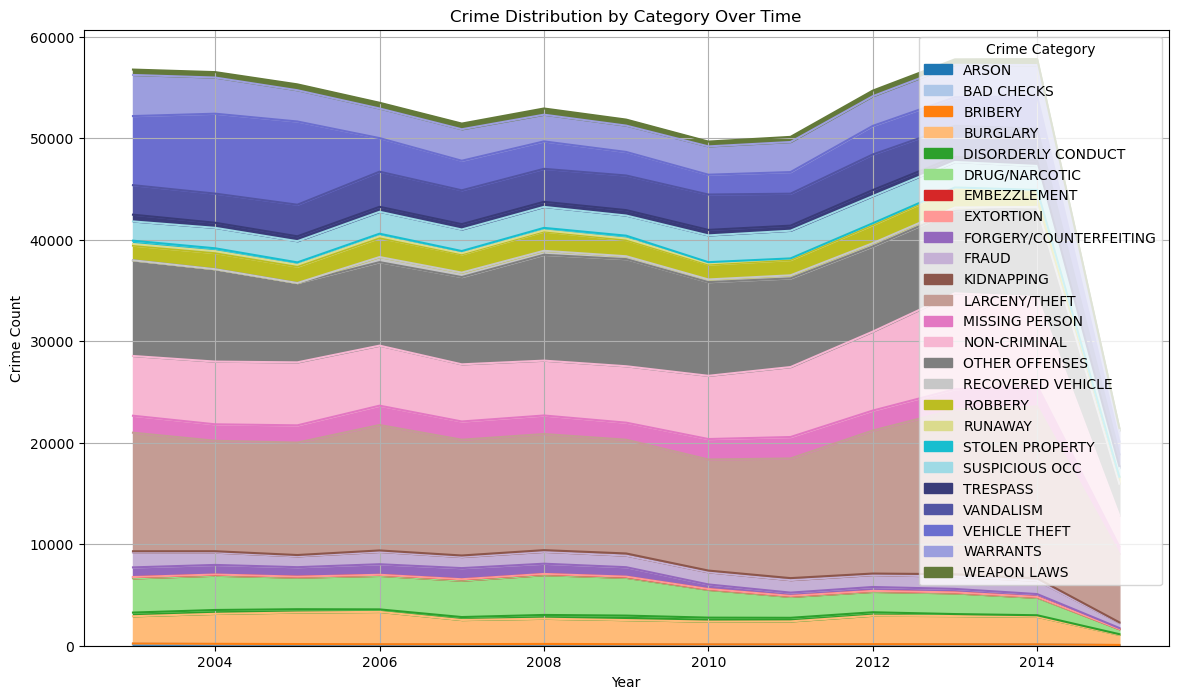

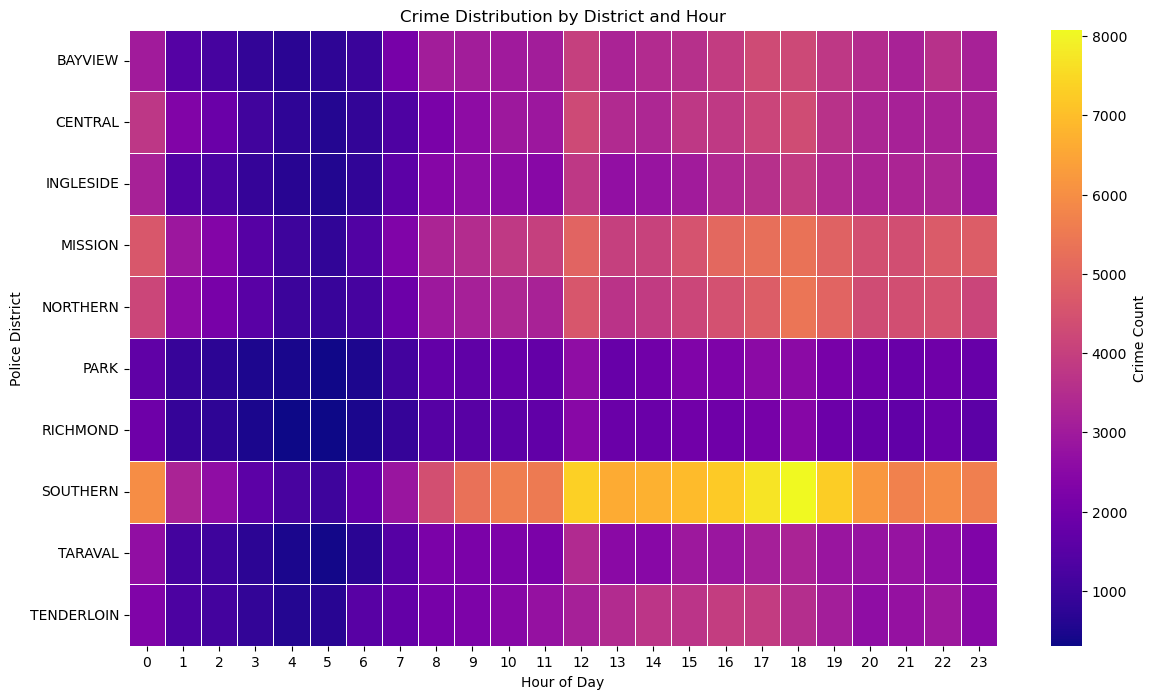

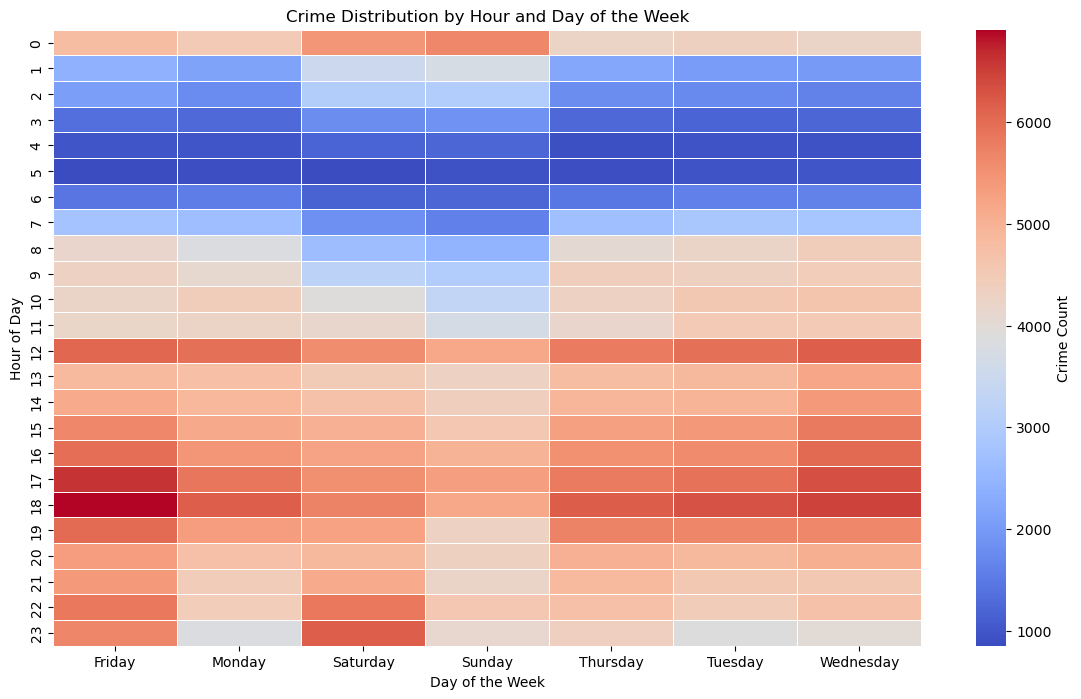

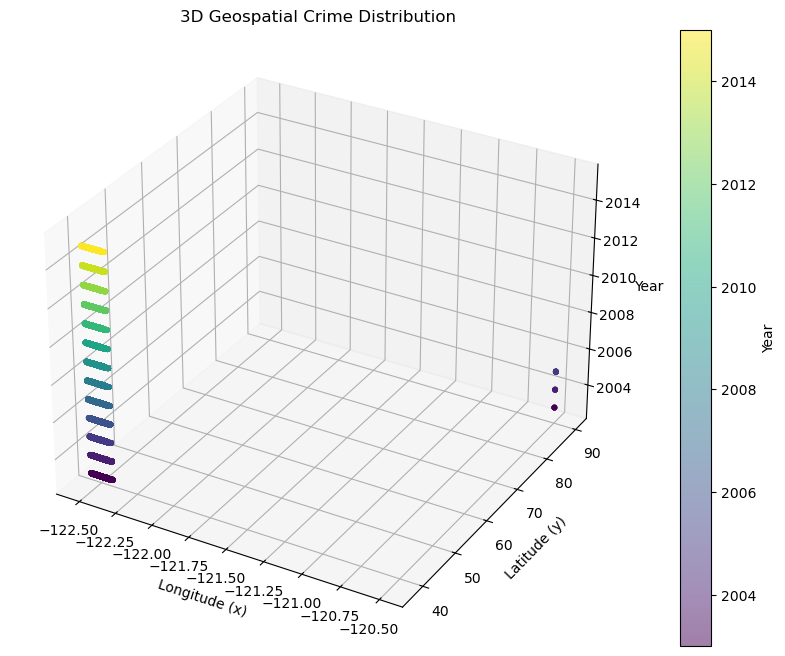

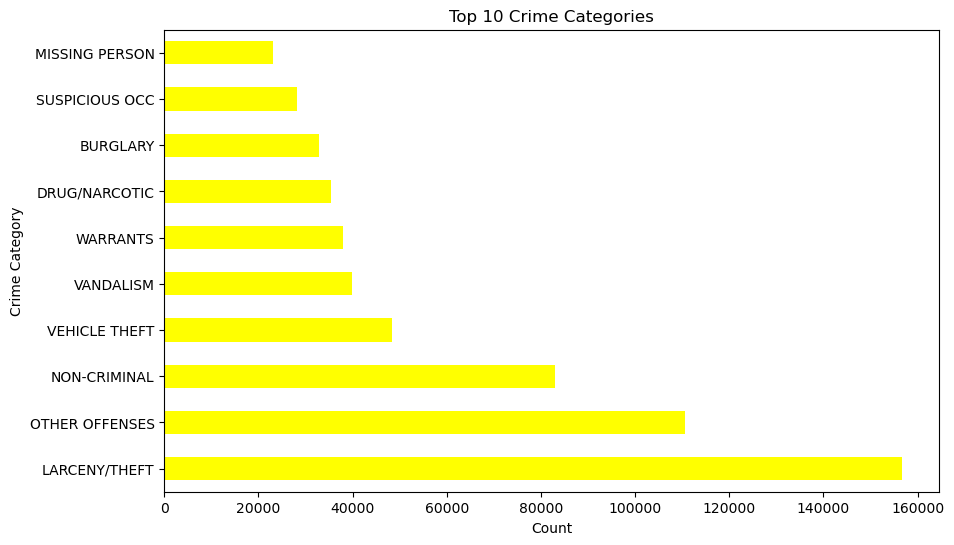

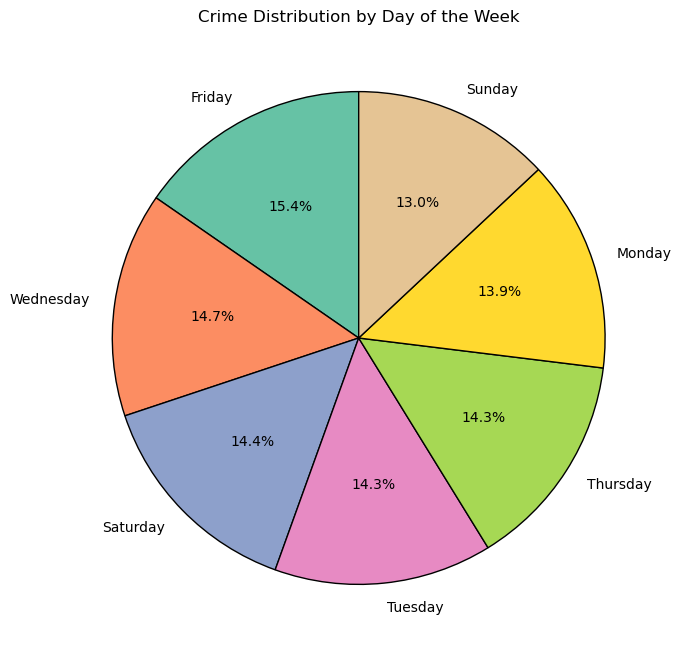

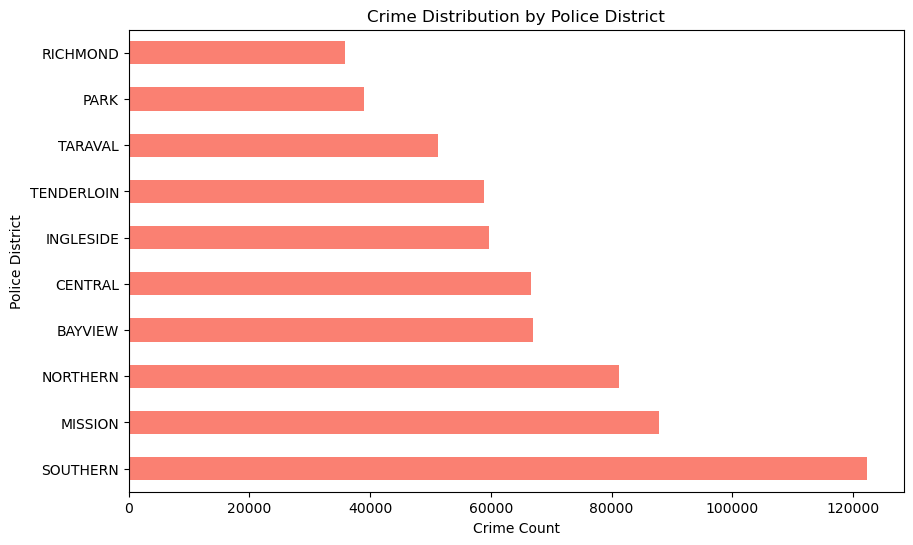

Model Accuracy: 0.9972

Classification Report:
                        precision    recall  f1-score   support

                 ARSON       1.00      1.00      1.00       285
            BAD CHECKS       1.00      1.00      1.00        65
               BRIBERY       1.00      1.00      1.00        45
              BURGLARY       1.00      1.00      1.00      6583
    DISORDERLY CONDUCT       1.00      1.00      1.00       787
         DRUG/NARCOTIC       1.00      1.00      1.00      6983
          EMBEZZLEMENT       1.00      1.00      1.00       239
             EXTORTION       1.00      1.00      1.00        40
FORGERY/COUNTERFEITING       1.00      1.00      1.00      1731
                 FRAUD       1.00      1.00      1.00      3022
            KIDNAPPING       1.00      1.00      1.00       455
         LARCENY/THEFT       1.00      1.00      1.00     31347
        MISSING PERSON       1.00      1.00      1.00      4629
          NON-CRIMINAL       1.00      1.00      1.00   

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

base_path = "/Users/rawnaqsaidalkindy/Desktop/ML_PROJECT/"  # Alter according to the dataset location locally due to large dataset
csv_path = os.path.join(base_path, "Competition_Dataset.csv")
df = pd.read_csv(csv_path)

# LEVEL 1:

# a. Cleaning and preprocessing:

df['Dates'] = pd.to_datetime(df['Dates'])

# Preprocessing:
df['Dates'] = pd.to_datetime(df['Dates'])
df['Year'] = df['Dates'].dt.year
df['Month'] = df['Dates'].dt.month
df['Day'] = df['Dates'].dt.day
df['Hour'] = df['Dates'].dt.hour
df['DayOfWeek'] = df['Dates'].dt.day_name()
df.drop_duplicates(inplace=True)
df.columns = df.columns.str.strip().str.lower()
df['descript'] = df['descript'].astype(str)
df['category'] = df['category'].astype(str)

# b. Visualization of trends:
# 1. Crime distribution over time using Stacked area plot
colors = plt.cm.tab20.colors + plt.cm.tab20b.colors
colors = colors[:25] # Combine two colormaps 'tab20' and 'tab20b' to get 40 distinct colors but will only use 25 as per total categories

plt.figure(figsize=(14,8))
category_time = df.groupby(['year', 'category']).size().unstack().fillna(0)
category_time.plot(kind='area', stacked=True, figsize=(14,8), color=colors)
plt.title('Crime Distribution by Category Over Time')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.legend(title='Crime Category')
plt.grid(True)
plt.show()

# 2. District and Hour crime distribution using Heatmap
plt.figure(figsize=(14,8))
district_hour_heatmap = df.groupby(['pddistrict', 'hour']).size().unstack().fillna(0)
sns.heatmap(district_hour_heatmap, annot=False, cmap="plasma", linewidths=.5, cbar_kws={'label': 'Crime Count'})
plt.title('Crime Distribution by District and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Police District')
plt.show()

# 3. Hour and Day of the Week crime distribution using Heatmap 
plt.figure(figsize=(14,8))
hour_day_heatmap = df.groupby(['hour', 'dayofweek']).size().unstack().fillna(0)
sns.heatmap(hour_day_heatmap, annot=False, cmap="coolwarm", linewidths=.5, cbar_kws={'label': 'Crime Count'})
plt.title('Crime Distribution by Hour and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of Day')
plt.show()

# 4. 3D Geospatial Crime Distribution using Enhanced Plotting
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['latitude (y)'], df['longitude (x)'], df['year'], c=df['year'], cmap='viridis', alpha=0.5, s=10)
fig.colorbar(scatter, ax=ax, label='Year')
ax.set_title("3D Geospatial Crime Distribution")
ax.set_xlabel("Longitude (x)")
ax.set_ylabel("Latitude (y)")
ax.set_zlabel("Year")
plt.show()

# 5. Top 10 Most Common Crime Categories using Horizontal Bar Plot
plt.figure(figsize=(10,6))
df['category'].value_counts().head(10).plot(kind='barh', color='yellow')
plt.title("Top 10 Crime Categories")
plt.xlabel("Count")
plt.ylabel("Crime Category")
plt.show()

# 6. Day of the week Crime Distribution using Pie Chart
day_counts = df['dayofweek'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2", len(day_counts)), startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Crime Distribution by Day of the Week")
plt.show()

# 7. Police District Crime distribution using Horizontal Bar Plot
plt.figure(figsize=(10,6))
df['pddistrict'].value_counts().plot(kind='barh', color='salmon')
plt.title("Crime Distribution by Police District")
plt.xlabel("Crime Count")
plt.ylabel("Police District")
plt.show()

# LEVEL 2:
# Part A

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['descript'])  # Transforming words to vectors with relative importance 
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['category'])  # Encoding the labels as numbers
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Training and testing data separation with a testing size of 20%

model = SVC(kernel='linear',random_state=42)  # Training a Support Vector Machine Model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) # Accuracy measure
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_)) # Classiifcation of precision, recall and f1-score

#Overall, with the results of the models accuracy and classification report, the model accuracy is very high (99.72%) and most crime categories are classified accurately (ex. ARSON, BURGLARY, BRIBERY) with a 100% score
#however, some categories have a lower precision score (ex. recovered vehicle), this could be due to an imbalance of dataset. For improvement, the model can be fine tuned by cross validation or hyperparameter optimization.

#Part B
def assign_severity(category):
    if category in ['NON-CRIMINAL', 'SUSPICIOUS OCCURRENCE', 'MISSING PERSON', 'RUNAWAY', 'RECOVERED VEHICLE', 'SUSPICIOUS OCC']:
        return 1 
    elif category in ['WARRANTS', 'OTHER OFFENSES', 'VANDALISM', 'TRESPASS', 'DISORDERLY CONDUCT', 'BAD CHECKS']:
        return 2  
    elif category in ['LARCENY/THEFT', 'VEHICLE THEFT', 'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 
                      'STOLEN PROPERTY', 'FRAUD', 'BRIBERY', 'EMBEZZLEMENT']:
        return 3 
    elif category in ['ROBBERY', 'WEAPON LAWS', 'BURGLARY', 'EXTORTION']:
        return 4  
    elif category in ['KIDNAPPING', 'ARSON']:
        return 5 
    else:
        return None  
        
predicted_categories = label_encoder.inverse_transform(y_pred) # Transform the predicted categories to their original labels 
predicted_severities = [assign_severity(category) for category in predicted_categories] # Predicted severities assigned accordingly
output_df = pd.DataFrame({
    'Predicted Category': predicted_categories,
    'Assigned Severity': predicted_severities
})
print(output_df.head(20))